In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

In [3]:
def load_data(fname):
    with open(fname, "r") as f:
        # ignore `vertices: ...` at head and `Total: ..` at tail
        raws = f.readlines()
    header = [i.strip() for i in raws[0].split(',')]
    lines = [[j.strip() for j in i.split(',')] for i in raws[1:]]
    t = pd.DataFrame.from_records(lines, columns=header)
    res = t[header].apply(pd.to_numeric, errors='ignore')
    return res

In [4]:
def load_files(paths):
    frames = [load_data(i) for i in paths]
    res = pd.concat(frames)
    return res

In [30]:
def gen_xy(df=None, colx='', coly='', ignore=True):
    tg = df.groupby(colx)
    x = []
    y = []
    for k, v in tg[coly].apply(lambda _: np.average(_)).items():
        if ignore and tg.size()[int(k)] < 100:
            continue
        x.append(int(k))
        y.append(v)
    return x, y

In [6]:
def plot_graph(xlabel='', ylabel='', xs=[[]], ys=[[]], labels=[], color=None):
    fig, ax = plt.subplots()
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

    n = len(xs)
    for i in range(n):
        x = xs[i]
        y = ys[i]
        if color is not None:
            ax.scatter(x, y, color=color)
            ax.plot(x, y, label=labels[i], color=color)
        else:
            ax.scatter(x, y)
            ax.plot(x, y, label=labels[i])
    ax.legend(labels)

# S1: EDBT vs Polyanya

[time] * [vnum, dist, K]

In [41]:
paths = os.listdir('../outputs/s1/')
paths = ['../outputs/s1/' + i for i in paths]

In [42]:
# paths = ['s1-1-300.log', 's1-2-300.log', 's1-3-300.log', 's1-4-300.log', 's1-5-300.log']
df = load_files(paths)
df = df[df.K == df.order]
df.head()

,K,order,dist,cost_ki,cost_edbt,vnum,density
3,4,4,1379.94,46.742,186373.0,4,1.07541
7,4,4,925.29,19.816,51884.1,2,1.07541
11,4,4,1225.90,29.856,122331.0,4,1.07541
15,4,4,1527.86,39.132,132107.0,4,1.07541
19,4,4,1326.32,40.740,214491.0,5,1.07541


In [43]:
df.shape

(16800, 7)

## Graph 1: [time, vnum]

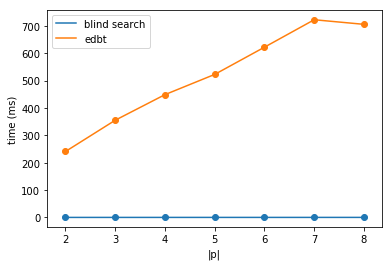

In [44]:
x0, y0 = gen_xy(df, 'vnum', 'cost_ki')
x1, y1 = gen_xy(df, 'vnum', 'cost_edbt')
y0 = [i / 1000 for i in y0]
y1 = [i / 1000 for i in y1]
plot_graph('|p|', 'time (ms)', [x0, x1], [y0, y1], ['blind search', 'edbt'])

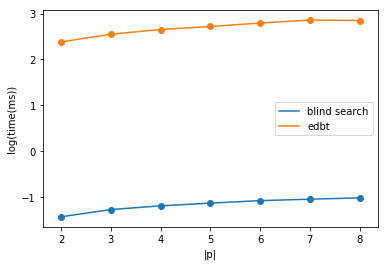

In [45]:
x0, y0 = gen_xy(df, 'vnum', 'cost_ki')
x1, y1 = gen_xy(df, 'vnum', 'cost_edbt')
y0 = [i / 1000 for i in y0]
y1 = [i / 1000 for i in y1]
y0 = np.log10(y0)
y1 = np.log10(y1)
plot_graph('|p|', 'log(time(ms))', [x0, x1], [y0, y1], ['blind search', 'edbt'])

## Graph 2: [time, dist]

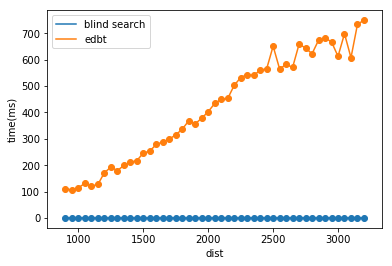

In [46]:
df2 = df.copy()
df2.dist = (df.dist / 50).astype(int)
x0, y0 = gen_xy(df2, 'dist', 'cost_ki')
x1, y1 = gen_xy(df2, 'dist', 'cost_edbt')
x0 = [i * 50 for i in x0]
x1 = [i * 50 for i in x1]
y0 = [i / 1000 for i in y0]
y1 = [i / 1000 for i in y1]
plot_graph('dist', 'time(ms)', [x0, x1], [y0, y1], ['blind search', 'edbt'])

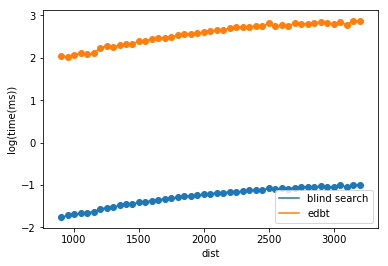

In [47]:
df2 = df.copy()
df2.dist = (df.dist / 50).astype(int)
x0, y0 = gen_xy(df2, 'dist', 'cost_ki')
x1, y1 = gen_xy(df2, 'dist', 'cost_edbt')
x0 = [i * 50 for i in x0]
x1 = [i * 50 for i in x1]
y0 = [i / 1000 for i in y0]
y1 = [i / 1000 for i in y1]
y0 = np.log10(y0)
y1 = np.log10(y1)
plot_graph('dist', 'log(time(ms))', [x0, x1], [y0, y1], ['blind search', 'edbt'])

## Graph 3: [time, K]

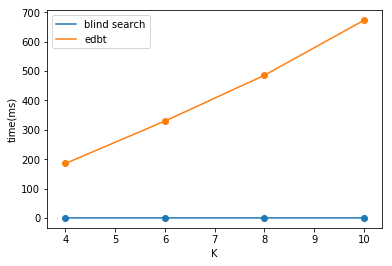

In [48]:
x0, y0 = gen_xy(df, 'K', 'cost_ki')
x1, y1 = gen_xy(df, 'K', 'cost_edbt')
y0 = [i / 1000 for i in y0]
y1 = [i / 1000 for i in y1]
plot_graph('K', 'time(ms)', [x0, x1], [y0, y1], ['blind search', 'edbt'])

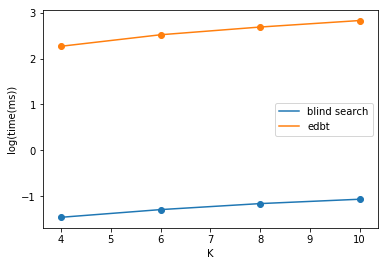

In [49]:
x0, y0 = gen_xy(df, 'K', 'cost_ki')
x1, y1 = gen_xy(df, 'K', 'cost_edbt')
y0 = [i / 1000 for i in y0]
y1 = [i / 1000 for i in y1]
y0 = np.log10(y0)
y1 = np.log10(y1)
plot_graph('K', 'log(time(ms))', [x0, x1], [y0, y1], ['blind search', 'edbt'])

# S2: Heuristic vs Polyanya
[generate node, pushed node, popped node, time, h-ratio] * [vnum, dist, density, K]

* generate node: how many nodes have been generated during the search
* pushed node: how many nodes have been pushed during the search
* popped node: how many nodes have been popped during the search
* h-ratio: heurstic elapsed time / total elapsed time

In [50]:
paths = os.listdir('../outputs/s2/')
paths = ['../outputs/s2/' + i for i in paths]

In [51]:
#paths = ['s2-1-300.log', 's2-1-9000.log', 's2-2-300.log', 's2-3-300.log']
df0 = load_files(paths)
df0.head()

,K,order,dist,cost_polyanya,cost_ki,cost_hi,h_cost,vnum,gen_poly,push_poly,...,suc_call_ki,gen_hi,push_hi,pop_hi,prune_hi,suc_call_hi,heuristic_call,reevaluate,pts,polys
0,5,5,50542.0,20767.6,97597.6,105602.0,90409.0,48,42038,40734,...,516318,11738,12959,10558,332,34330,11562,1598,8,4180
1,5,5,50786.4,20832.0,66721.4,81714.3,69598.0,50,41531,40196,...,422295,8929,10360,8491,232,25453,9348,1735,8,4180
2,5,5,43168.6,18467.4,80682.0,86197.9,75058.0,49,40317,39129,...,466506,8081,9713,8019,218,24090,8803,1871,8,4180
3,5,5,67592.2,34187.4,117430.0,185898.0,160625.0,27,68741,66691,...,696528,17754,20559,17161,613,56954,18579,3366,8,4180
4,5,5,58869.4,29415.4,105308.0,116583.0,101126.0,52,68100,66109,...,631614,10155,13537,11488,302,29408,12327,3683,8,4180


In [23]:
df0 = load_files(['../test.log'])

In [24]:
df = df0[(df0.K <= 1) & (df0.K == df0.order)]

In [25]:
(df.cost_ki / df.cost_hi).mean()

0.60727022649386664

## 1. Examine `vnum`

* Graph 1: `[gen node, vnum]`
* Graph 2: `[push node, vnum]`
* Graph 3: `[pop node, vnum]`
* Graph 4: `[time, vnum]`

In [26]:
df.head()

,K,order,dist,cost_polyanya,cost_ki,cost_hi,h_cost,vnum,gen_poly,push_poly,...,suc_call_ki,gen_hi,push_hi,pop_hi,prune_hi,suc_call_hi,heuristic_call,reevaluate,pts,polys
0,1,1,272.7660,1581.48,1858.720,6341.060,5155,7,4592,4506,...,10475,1186,1171,1019,4,3540,1026,0,4,294
1,1,1,91.1073,2995.25,216.399,267.108,225,4,6676,6350,...,894,78,75,47,0,74,37,0,4,294
2,1,1,537.7720,11656.80,3702.450,12120.800,9720,14,26485,25524,...,24278,2281,2217,2054,9,7675,1937,0,4,294
3,1,1,224.9570,1627.76,1090.480,3819.010,3127,14,4806,4706,...,6811,719,710,641,2,1967,624,0,4,294
4,1,1,400.5190,3750.32,2650.140,11982.000,9675,17,9344,8916,...,17955,2367,2273,2071,12,7477,1868,0,4,294


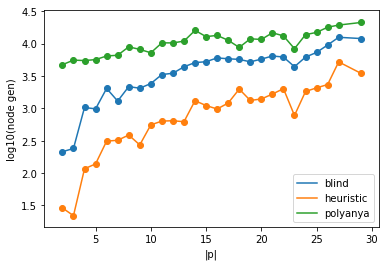

In [35]:
# Graph 1: [gen node, vnum]
x0, y0 = gen_xy(df[df.K <= 1], 'vnum', 'gen_ki', False)
x1, y1 = gen_xy(df[df.K <= 1], 'vnum', 'gen_hi', False)
x2, y2 = gen_xy(df[df.K <= 1], 'vnum' ,'gen_poly', False)
y0 = np.log10(y0)
y1 = np.log10(y1)
y2 = np.log10(y2)
plot_graph('|p|', 'log10(node gen)', [x0, x1, x2], [y0, y1, y2], ['blind', 'heuristic', 'polyanya'])

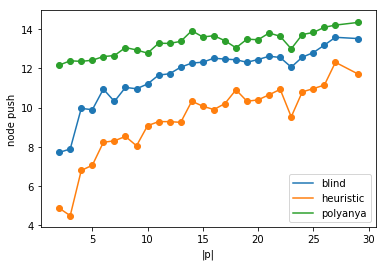

In [32]:
# Graph 2: [push node, vnum]
x0, y0 = gen_xy(df, 'vnum', 'push_ki', False)
x1, y1 = gen_xy(df, 'vnum', 'push_hi', False)
x2, y2 = gen_xy(df, 'vnum' ,'push_poly', False)
y0 = np.log2(y0)
y1 = np.log2(y1)
y2 = np.log2(y2)
plot_graph('|p|', 'node push', [x0, x1, x2], [y0, y1, y2], ['blind', 'heuristic', 'polyanya'])

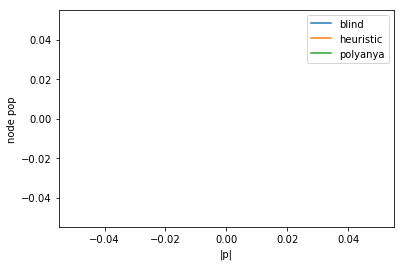

In [22]:
# Graph 3: [pop node, vnum]
x0, y0 = gen_xy(df, 'vnum', 'pop_ki')
x1, y1 = gen_xy(df, 'vnum', 'pop_hi')
x2, y2 = gen_xy(df, 'vnum' ,'pop_poly')
y0 = np.log2(y0)
y1 = np.log2(y1)
y2 = np.log2(y2)
plot_graph('|p|', 'node pop', [x0, x1, x2], [y0, y1, y2], ['blind', 'heuristic', 'polyanya'])

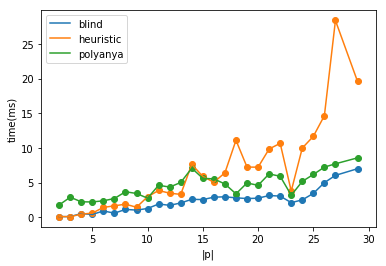

In [33]:
# Graph 4: [time, vnum]
x0, y0 = gen_xy(df, 'vnum', 'cost_ki', False)
x1, y1 = gen_xy(df, 'vnum', 'cost_hi', False)
x2, y2 = gen_xy(df, 'vnum' ,'cost_polyanya', False)
y0 = [i / 1000 for i in y0]
y1 = [i / 1000 for i in y1]
y2 = [i / 1000 for i in y2]
plot_graph('|p|', 'time(ms)', [x0, x1, x2], [y0, y1, y2], ['blind', 'heuristic', 'polyanya'])

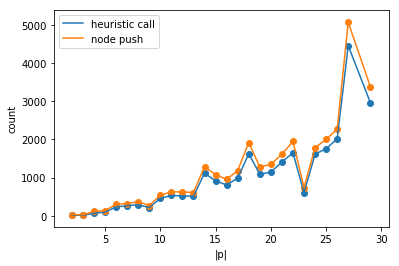

In [34]:
# Graph 5: [h-call, vnum]
x0, y0 = gen_xy(df, 'vnum', 'heuristic_call', False)
x1, y1 = gen_xy(df, "vnum", 'push_hi', False)
plot_graph('|p|', 'count', [x0, x1], [y0, y1], ['heuristic call', 'node push'])

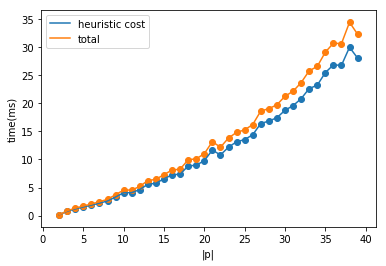

In [60]:
# Graph 6: [h-ratio, vnum]
x0, y0 = gen_xy(df, 'vnum', 'h_cost')
x1, y1 = gen_xy(df, 'vnum', 'cost_hi')
y0 = [i / 1000 for i in y0]
y1 = [i / 1000 for i in y1]
plot_graph('|p|', 'time(ms)', [x0, x1], [y0, y1], ['heuristic cost', 'total'])

### Explain

* Graph 1, 2, 3 show that the search space of the `heuristic` approach is always smaller than `knn` and `polyanya`.

* Graph 4 shows that the `heuristic` approach is the fastest when `vnum <=40`

* Graph 5, 6 explain the reason why the `heuristic` approach becomes slow when `vnum > 40`

## 2. Examine `poly num`

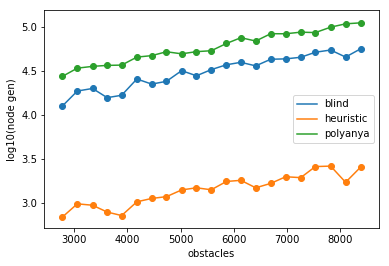

In [61]:
# Graph 7: [nodes gen, polys]
x0, y0 = gen_xy(df, 'polys', 'gen_ki')
x1, y1 = gen_xy(df, 'polys', 'gen_hi')
x2, y2 = gen_xy(df, 'polys', 'gen_poly')
y0 = np.log10(y0)
y1 = np.log10(y1)
y2 = np.log10(y2)
plot_graph('obstacles', 'log10(node gen)', [x0, x1, x2], [y0, y1, y2], ['blind', 'heuristic', 'polyanya'])

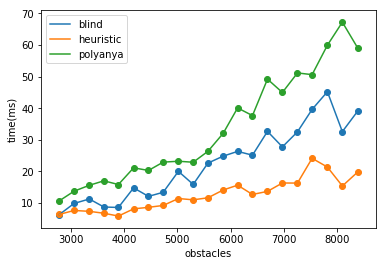

In [62]:
# Graph 8: [time, polys]
x0, y0 = gen_xy(df, 'polys', 'cost_ki')
x1, y1 = gen_xy(df, 'polys', 'cost_hi')
x2, y2 = gen_xy(df, 'polys', 'cost_polyanya')
y0 = [i / 1000 for i in y0]
y1 = [i / 1000 for i in y1]
y2 = [i / 1000 for i in y2]
plot_graph('obstacles', 'time(ms)', [x0, x1, x2], [y0, y1, y2], ['blind', 'heuristic', 'polyanya'])

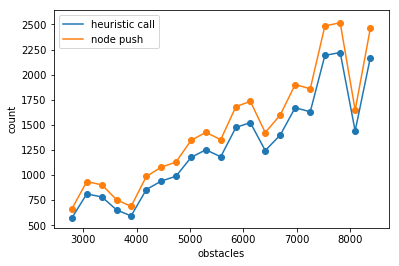

In [63]:
x0, y0 = gen_xy(df, 'polys', 'heuristic_call')
x1, y1 = gen_xy(df, 'polys', 'push_hi')
plot_graph("obstacles", 'count', [x0, x1], [y0, y1], ['heuristic call', 'node push'])

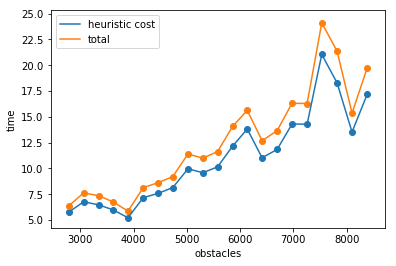

In [64]:
x0, y0 = gen_xy(df, 'polys', 'h_cost')
x1, y1 = gen_xy(df, 'polys', 'cost_hi')
y0 = [i / 1000 for i in y0]
y1 = [i / 1000 for i in y1] 
plot_graph("obstacles", "time", [x0, x1], [y0, y1], ["heuristic cost", "total"])

### Explain

* Graph 7 shows that the search space of the `heuristic` approach is always smaller than `knn` and `polyanya`

* Graph 8 shows that the time is increasing when the number of obstacles increase, and `heuristic` is the fastest when `K=1`

## 3. Examine `points num`

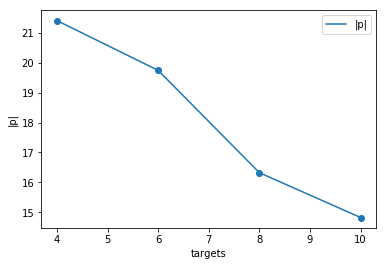

In [65]:
x0, y0 = gen_xy(df, 'pts', 'vnum')
plot_graph('targets', '|p|', [x0], [y0], ['|p|'])

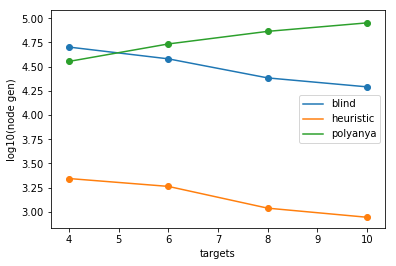

In [66]:
# Graph 9: [node push, pts]
x0, y0 = gen_xy(df, 'pts', 'gen_ki')
x1, y1 = gen_xy(df, 'pts', 'gen_hi')
x2, y2 = gen_xy(df, 'pts', 'gen_poly')
y0 = np.log10(y0)
y1 = np.log10(y1)
y2 = np.log10(y2)
plot_graph('targets', 'log10(node gen)', [x0, x1, x2], [y0, y1, y2], ['blind', 'heuristic', 'polyanya'])

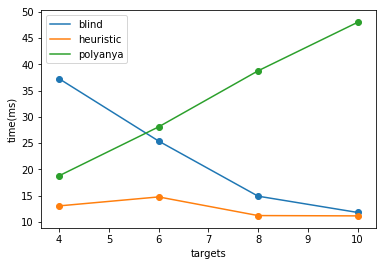

In [67]:
# Graph 10: [time, pts]
x0, y0 = gen_xy(df, 'pts', 'cost_ki')
x1, y1 = gen_xy(df, 'pts', 'cost_hi')
x2, y2 = gen_xy(df, 'pts', 'cost_polyanya')
y0 = [i / 1000 for i in y0]
y1 = [i / 1000 for i in y1]
y2 = [i / 1000 for i in y2]
plot_graph('targets', 'time(ms)', [x0, x1, x2], [y0, y1, y2], ['blind', 'heuristic', 'polyanya'])

### Explain

* Graph 9 shows that the search space of `heuristic` and `knn` decreased by `pts`, and the search space of `heuristic` is smaller than others

* Graph 10 shows that the execution time of `heuristic` and `knn` decreased by `pts`, and `knn` is faster than `heuristic` when `pts >= 10`

## 4. Examine `K (|pts| = 10)`

In [69]:
df = df0[df0.pts >= 1]

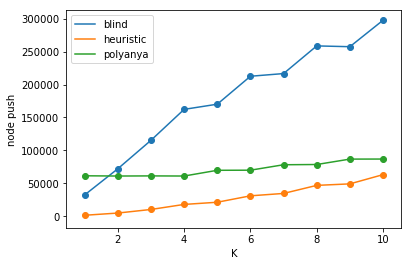

In [70]:
# Graph 11: [node push, K]
x0, y0 = gen_xy(df, 'K', 'push_ki')
x1, y1 = gen_xy(df, 'K', 'push_hi')
x2, y2 = gen_xy(df, 'K', 'push_poly')
plot_graph('K', 'node push', [x0, x1, x2], [y0, y1, y2], ['blind', 'heuristic', 'polyanya'])

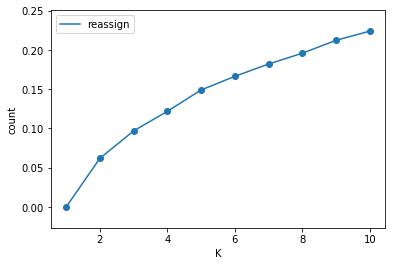

In [71]:
x2, y2 = gen_xy(df, 'K', 'push_hi')
x3, y3 = gen_xy(df, 'K', 'reevaluate')
y4 = [float(y3[i] / y2[i]) for i in range(len(x2))]
plot_graph('K', 'count', [x3], [y4], ['reassign'])

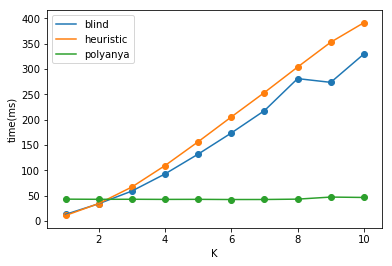

In [72]:
# Graph 12: [time, K]
x0, y0 = gen_xy(df[df.pts >= 8], 'K', 'cost_ki')
x1, y1 = gen_xy(df[df.pts >= 8], 'K', 'cost_hi')
x2, y2 = gen_xy(df[df.pts >= 8], 'K', 'cost_polyanya')
y0 = [i / 1000 for i in y0]
y1 = [i / 1000 for i in y1]
y2 = [i / 1000 for i in y2]
plot_graph('K', 'time(ms)', [x0, x1, x2], [y0, y1, y2], ['blind', 'heuristic', 'polyanya'])

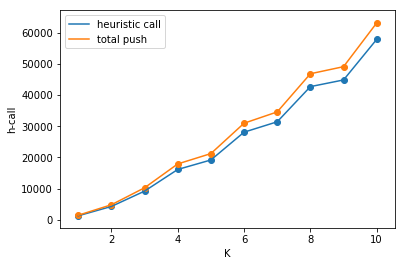

In [175]:
# Graph 13: [heuristic call, K]
x0, y0 = gen_xy(df, 'K', 'heuristic_call')
x1, y1 = gen_xy(df, 'K', 'push_hi')
plot_graph('K', 'h-call', [x0, x1], [y0, y1], ['heuristic call', 'total push'])

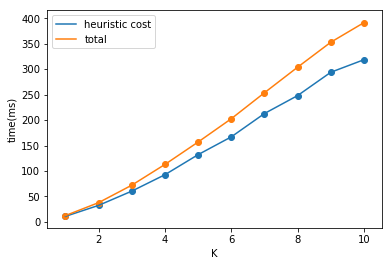

In [176]:
x0, y0 = gen_xy(df, "K", "h_cost")
x1, y1 = gen_xy(df, "K", "cost_hi")
y0 = [i / 1000 for i in y0]
y1 = [i / 1000 for i in y1]
plot_graph('K', 'time(ms)', [x0, x1], [y0, y1], ['heuristic cost', 'total'])

### Explain

* Graph 11: the search space of `heuristic` and `knn` are increased by `K`, and the search space of `heuristic` is always smaller than `polyanya`

* Graph 12 shows that the `heuristic` approach would be slower than others when `K>2`

* Graph 13 shows the reason why the `heuristic` approach becomes slow